In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('googleplaystore.csv')

df.head(5)

df =df.drop_duplicates()
df = df.dropna()



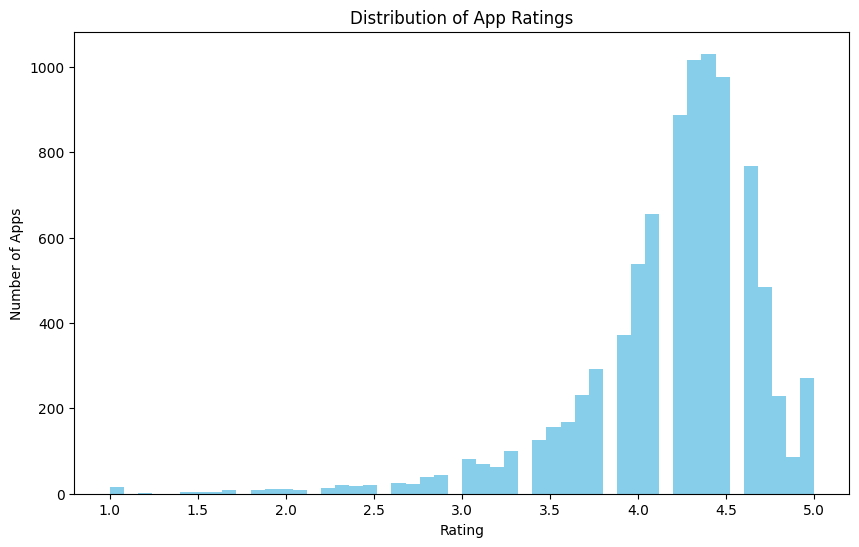

In [51]:

# Drop rows with missing ratings


# Plot the rating distribution
plt.figure(figsize=(10,6))
plt.hist(df['Rating'], bins=50, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()


In [52]:
# Sort by number of reviews and installs
top_reviews = df[['App', 'Reviews']].sort_values(by='Reviews',ascending=False).head(10)
top_installs = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)

print("Top 10 Apps by Reviews:\n", top_reviews)
print("\nTop 10 Apps by Installs:\n", top_installs)


Top 10 Apps by Reviews:
                                                     App Reviews
2989                             GollerCepte Live Score    9992
4970                       Ad Block REMOVER - NEED ROOT     999
2705                                SnipSnap Coupon App    9975
3229                                         DreamTrips    9971
3049                  US Open Tennis Championships 2018    9971
7002   Adult Color by Number Book - Paint Mandala Pages     997
6724                     BSPlayer ARMv7 VFP CPU support    9966
7982  Easy Resume Builder, Resume help, Curriculum v...     996
353                                   MegaFon Dashboard   99559
326   Buff Thun - Daily Free Webtoon / Comics / Web ...    9952

Top 10 Apps by Installs:
                                                     App      Installs
4041                                       Temple Run 2  500,000,000+
4122                        LINE: Free Calls & Messages  500,000,000+
4147                       Gboard 

In [55]:
# Count of apps in each category
app_count_by_category = df['Category'].value_counts()
print(app_count_by_category)

# Category with the most apps
most_apps_category = app_count_by_category.idxmax()
print(f"Category with most apps: {most_apps_category}")



Category
FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: count, dtype: int64
Category with most apps: FAMILY


In [56]:
# Count of apps in each genre
genre_count = df['Genres'].value_counts()
print(genre_count)

# Number of unique genres
unique_genres = df['Genres'].nunique()
print(f"Number of unique genres: {unique_genres}")


Genres
Tools                       732
Entertainment               498
Education                   446
Action                      349
Productivity                334
                           ... 
Role Playing;Brain Games      1
Strategy;Education            1
Racing;Pretend Play           1
Communication;Creativity      1
Strategy;Creativity           1
Name: count, Length: 115, dtype: int64
Number of unique genres: 115


In [63]:
# Percentage of free apps in each category
free_apps_by_category = df[df['Type'] == 'Free'].groupby('Category').size() / df.groupby('Category').size() * 100
print(free_apps_by_category)


Category
ART_AND_DESIGN          95.081967
AUTO_AND_VEHICLES       98.630137
BEAUTY                 100.000000
BOOKS_AND_REFERENCE     95.480226
BUSINESS                96.666667
COMICS                 100.000000
COMMUNICATION           92.833876
DATING                  97.484277
EDUCATION               96.899225
ENTERTAINMENT           98.198198
EVENTS                 100.000000
FAMILY                  90.856144
FINANCE                 95.899054
FOOD_AND_DRINK          98.113208
GAME                    92.830540
HEALTH_AND_FITNESS      95.801527
HOUSE_AND_HOME         100.000000
LIBRARIES_AND_DEMO     100.000000
LIFESTYLE               94.098361
MAPS_AND_NAVIGATION     95.967742
MEDICAL                 78.807947
NEWS_AND_MAGAZINES      99.065421
PARENTING               96.000000
PERSONALIZATION         78.896104
PHOTOGRAPHY             94.736842
PRODUCTIVITY            94.610778
SHOPPING                99.009901
SOCIAL                  99.180328
SPORTS                  92.307692
TOOLS

In [67]:
# Sort the DataFrame by the 'Reviews' column in descending order to get the apps with the highest number of reviews
top_10_apps = df.sort_values(by='Reviews', ascending=False).head(10)


# Display the top 10 apps with their categories and reviews
print(top_10_apps)


                                                    App          Category  \
2989                             GollerCepte Live Score            SPORTS   
4970                       Ad Block REMOVER - NEED ROOT             TOOLS   
2705                                SnipSnap Coupon App          SHOPPING   
3229                                         DreamTrips  TRAVEL_AND_LOCAL   
3049                  US Open Tennis Championships 2018            SPORTS   
7002   Adult Color by Number Book - Paint Mandala Pages            FAMILY   
6724                     BSPlayer ARMv7 VFP CPU support     VIDEO_PLAYERS   
7982  Easy Resume Builder, Resume help, Curriculum v...             TOOLS   
353                                   MegaFon Dashboard     COMMUNICATION   
326   Buff Thun - Daily Free Webtoon / Comics / Web ...            COMICS   

      Rating Reviews                Size     Installs  Type Price  \
2989     4.2    9992                 31M   1,000,000+  Free     0   
4970     3.3  

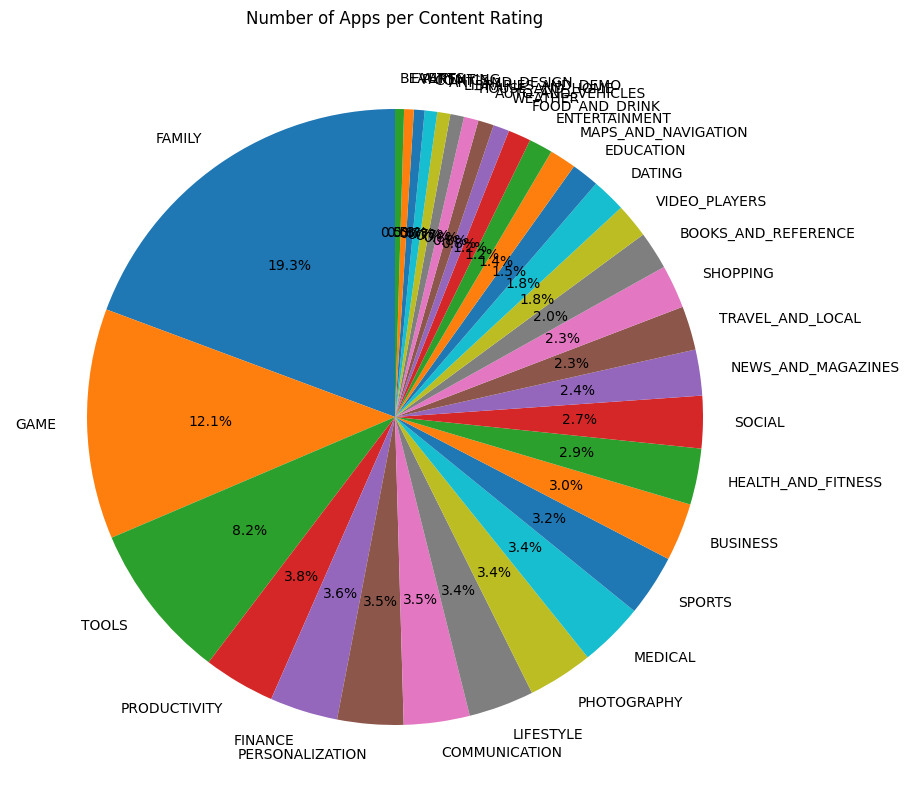

In [78]:
Category_count = df['Category'].value_counts()

plt.figure(figsize=(20, 10))
Category_count.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Number of Apps per Content Rating')
plt.ylabel('')
plt.show()




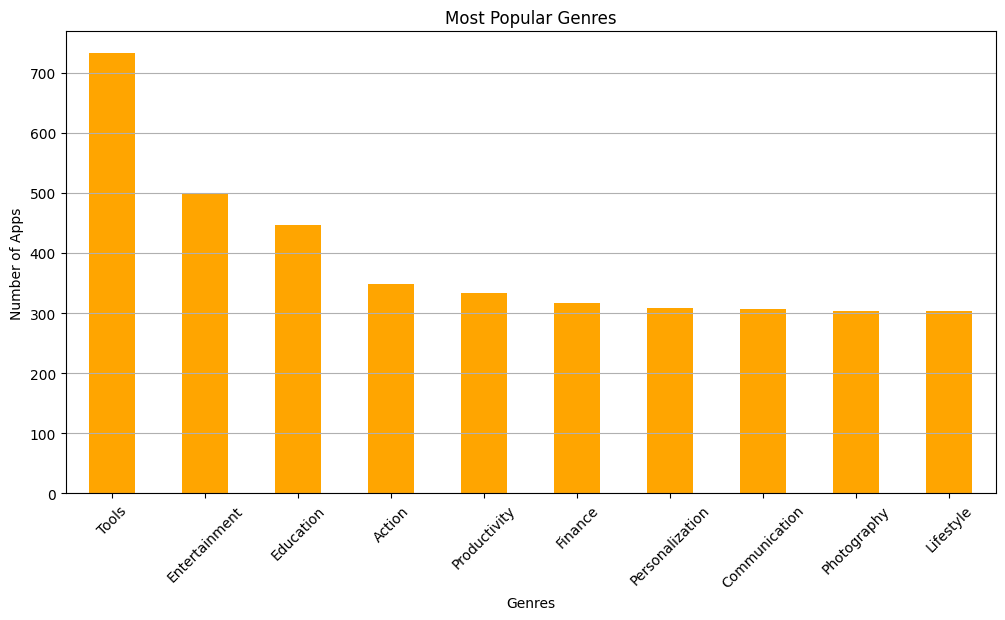

In [79]:
most_popular_genres = df['Genres'].value_counts().head(10)

plt.figure(figsize=(12, 6))
most_popular_genres.plot(kind='bar', color='orange')
plt.title('Most Popular Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [59]:

# Minimum and maximum ratings by category
min_max_ratings_by_category = df.groupby('Category')['Rating'].agg(['min', 'max'])
print(min_max_ratings_by_category)


                     min  max
Category                     
ART_AND_DESIGN       3.4  5.0
AUTO_AND_VEHICLES    2.1  4.9
BEAUTY               3.1  4.9
BOOKS_AND_REFERENCE  2.7  5.0
BUSINESS             1.0  5.0
COMICS               2.8  5.0
COMMUNICATION        1.0  5.0
DATING               1.0  5.0
EDUCATION            3.5  4.9
ENTERTAINMENT        3.0  4.7
EVENTS               2.9  5.0
FAMILY               1.0  5.0
FINANCE              1.0  5.0
FOOD_AND_DRINK       1.7  5.0
GAME                 1.0  5.0
HEALTH_AND_FITNESS   1.4  5.0
HOUSE_AND_HOME       2.8  4.8
LIBRARIES_AND_DEMO   3.1  5.0
LIFESTYLE            1.5  5.0
MAPS_AND_NAVIGATION  1.9  4.9
MEDICAL              1.0  5.0
NEWS_AND_MAGAZINES   1.7  5.0
PARENTING            2.0  5.0
PERSONALIZATION      2.5  5.0
PHOTOGRAPHY          2.0  5.0
PRODUCTIVITY         1.0  5.0
SHOPPING             1.6  5.0
SOCIAL               1.9  5.0
SPORTS               1.5  5.0
TOOLS                1.0  5.0
TRAVEL_AND_LOCAL     2.2  5.0
VIDEO_PLAY

In [61]:
# Find the largest and smallest apps by size
largest_app = df.loc[df['Size'].idxmax()]
smallest_app = df.loc[df['Size'].idxmin()]

print(f"Largest app: {largest_app['App']} with size {largest_app['Size']}")
print(f"Smallest app: {smallest_app['App']} with size {smallest_app['Size']}")



Largest app: Floor Plan Creator with size Varies with device
Smallest app: BL PowerPoint Remote with size 1.0M


In [62]:
# Sum installs by category
installs_by_category = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Top 5 categories by installs
top_5_installs_category = installs_by_category.head(5)
print(top_5_installs_category)


Category
PRODUCTIVITY       500,000,000+10,000,000+100,000,000+10,000,000+...
BEAUTY             500,000+1,000,000+100,000+500,000+1,000,000+50...
FAMILY             50,000,000+10,000,000+100,000,000+1,000,000+5,...
WEATHER            50,000,000+1,000,000+50,000,000+10,000+10,000,...
PERSONALIZATION    50,000,000+1,000,000+100,000,000+5,000,000+100...
Name: Installs, dtype: object
